# ECG Data Monitoring using Pynq

This is part of EE712 - Embedded Systems as course project done by Aravind, Rajesh, Souhardhya under guidance of Prof. Laxmeesha Somappa, Prof. Dinesh Sharma

In [1]:
# from pynq.overlays.base import Overlay
from pynq import pl
from pynq import Overlay
from pynq.lib.video import *

from pynq import GPIO
import numpy as np
from pynq import allocate
import matplotlib.pyplot as mp

import time
import random
import math



In [2]:
overlay = Overlay("./merged_v1_3.bit")
hdmi_out = overlay.video.hdmi_out
#Configuring HDMI functionality
hdmi_conf = pynq.lib.video.common.VideoMode(1280, 720, 24, stride=None)
hdmi_out.configure(hdmi_conf)
hdmi_out.start()

In [3]:
dma = overlay.axi_dma_0
recvstatus = dma.recvchannel.running
print(recvstatus)

True


In [4]:
#Display and Cross Hair on Display
g = hdmi_out.newframe()
y = np.zeros([720, 1280, 3], dtype=np.uint8)
# g[:] = np.full_like(y, [220, 218, 168])

g[:] = np.full_like(y, [255, 255, 255])
# g[:] = np.full((720, 1280, 3), 10,dtype=np.uint8)
g[360] = np.full((1280, 3), 100,dtype=np.uint8)  #makes horizontal axis lines
g[:, 640] = np.full((720, 3), 100,dtype=np.uint8) #makes vertical axis lines
hdmi_out.writeframe(g)
g.flush()

In [5]:
#Defining the buffer for ADC input
actual_buffer = np.zeros(1000, dtype = np.uint16)
input_buffer = allocate (shape=(128,), dtype=np.uint16)
buffer16 = np.zeros(16, dtype = np.uint16)

In [6]:
#Function of decimation of array
def downsample_array(arr):
    # Reshape the array into shape (16, 8) by taking every 8 elements as a row
    reshaped_arr = arr.reshape((4,32))
    # Take the first element from each row
    downsampled_arr = reshaped_arr[:, 0]
    return downsampled_arr.astype(np.uint16)

In [7]:
#Function of decimation of array using mean
def downsample_mean_array(arr):
    # Reshape the array into shape (8, 16) by taking every 16 elements as a row
    reshaped_arr = arr.reshape((1, 128))
    # Calculate the mean along the second axis (axis=1) which represents every 16 samples
    downsampled_arr = np.mean(reshaped_arr, axis=1)
    return downsampled_arr.astype(np.uint16)

In [8]:
#Used for testing ADC for 1000 read cycles
for i in range(0,1000):
    dma.recvchannel.transfer(input_buffer)
    dma.recvchannel.wait()
    actual_buffer[i] = downsample_mean_array(input_buffer)/200
#     print(actual_buffer[0:32])

In [9]:
#Get a dotted plot of the buffer
def dotted_plot(actual_buffer):
    mp.plot(actual_buffer, linestyle='dotted', marker='.')
    mp.xlabel('X Values')
    mp.ylabel('Y Values')
    mp.title('Dotted Plot')
    mp.grid(True)  # Optional: Add grid lines
    mp.show()

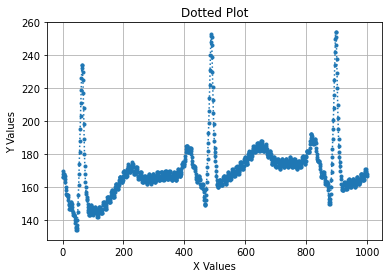

In [10]:
dotted_plot(actual_buffer)

In [11]:
#We defined our own font to print on display
font = [
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 0     #A
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0    #B
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 0     #C
        ]),
    np.array([
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 1     #D
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 0     #E
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1     #F
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 1,
        0, 1, 1, 0, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0     #G
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0     #H
        ]),
    np.array([
        0, 0, 0, 0, 0,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1,
        0, 0, 0, 0, 0     #I
        ]),
    np.array([
        1, 1, 1, 0, 0,
        1, 1, 1, 1, 0,
        1, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0     #J
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 0, 1,
        0, 0, 0, 1, 1,
        0, 1, 1, 0, 1,
        0, 1, 1, 1, 0     #K
        ]),
    np.array([
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 0     #L
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 0, 1, 0, 0,
        0, 1, 0, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0     #M
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 0, 1, 1, 0,
        0, 1, 0, 1, 0,
        0, 1, 1, 0, 0,
        0, 1, 1, 1, 0     #N
        ]),
    np.array([
        1, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        1, 0, 0, 0, 1     #0
        ]),
    np.array([
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1     #P
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0,
        1, 1, 0, 1, 1     #Q
        ]),
    np.array([
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0     #R
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 0,
        1, 1, 1, 1, 0,
        0, 0, 0, 0, 0     #S
        ]),
    np.array([
        0, 0, 0, 0, 0,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1     #T
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0     #U
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        1, 0, 1, 0, 1,
        1, 0, 1, 0, 1,
        1, 1, 0, 1, 1     #V
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 0, 1, 0,
        0, 1, 0, 1, 0,
        1, 0, 1, 0, 1     #W
        ]),
    np.array([
        0, 1, 1, 1, 0,
        1, 0, 1, 0, 1,
        1, 1, 0, 1, 1,
        1, 0, 1, 0, 1,
        0, 1, 1, 1, 0     #X
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        1, 0, 1, 0, 1,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1     #Y
        ]),
    np.array([
        0, 0, 0, 0, 0,
        1, 1, 1, 0, 1,
        1, 1, 0, 1, 1,
        1, 0, 1, 1, 1,
        0, 0, 0, 0, 0     #Z
        ]),
    ###########################################
    np.array([
        1, 0, 0, 0, 1,
        1, 0, 1, 0, 1,
        1, 0, 1, 0, 1,
        1, 0, 1, 0, 1,
        1, 0, 0, 0, 1     #0
    ]),
    
    np.array([
        1, 1, 0, 1, 1,
        1, 0, 0, 1, 1,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1,
        1, 0, 0, 0, 1     #1
    ]), 
    np.array([
        1, 0, 0, 0, 1,
        1, 1, 1, 0, 1,
        1, 0, 0, 0, 1,
        1, 0, 1, 1, 1,
        1, 0, 0, 0, 1     #2
    ]), 
    np.array([
        1, 0, 0, 0, 1,
        1, 1, 1, 0, 1,
        1, 0, 0, 0, 1,
        1, 1, 1, 0, 1,
        1, 0, 0, 0, 1     #3
    ]), 
    
    np.array([
        1, 0, 1, 0, 1,
        1, 0, 1, 0, 1,
        1, 0, 0, 0, 1,
        1, 1, 1, 0, 1,
        1, 1, 1, 0, 1     #4
    ]), 
    np.array([
        1, 0, 0, 0, 1,
        1, 0, 1, 1, 1,
        1, 0, 0, 0, 1,
        1, 1, 1, 0, 1,
        1, 0, 0, 0, 1     #5
    ]), 
    np.array([
        1, 0, 0, 0, 1,
        1, 0, 1, 1, 1,
        1, 0, 0, 0, 1,
        1, 0, 1, 0, 1,
        1, 0, 0, 0, 1     #6
    ]), 
    
    np.array([
        1, 0, 0, 0, 1,
        1, 1, 1, 0, 1,
        1, 1, 1, 0, 1,
        1, 1, 1, 0, 1,
        1, 1, 1, 0, 1     #7
    ]), 
    np.array([
        1, 0, 0, 0, 1,
        1, 0, 1, 0, 1,
        1, 0, 0, 0, 1,
        1, 0, 1, 0, 1,
        1, 0, 0, 0, 1     #8
    ]), 
    np.array([
        1, 0, 0, 0, 1,
        1, 0, 1, 0, 1,
        1, 0, 0, 0, 1,
        1, 1, 1, 0, 1,
        1, 0, 0, 0, 1     #9
    ])
]

#     np.array([
#         1, 1, 1, 1, 1,
#         1, 1, 1, 1, 1,
#         1, 1, 1, 1, 1,
#         1, 1, 1, 1, 1,
#         1, 1, 1, 1, 1     #J
#         ]), 
# print(font[1])

In [12]:
#Used for setting matrix values for a single character
def print_c(char, posx, posy, size):
    if(ord(char)>=97 and ord(char)<=122):
        char_pixel = font[ord(char)-97]
    elif(ord(char)>=65 and ord(char)<=90):
        char_pixel = font[ord(char)-65]
    elif(ord(char)>=48 and ord(char)<=57):
        char_pixel = font[ord(char)-48+26]
    else:
        return
    #48-57
#     i = font[0]
#     print(i)
#     i = np.multiply(i, 255).repeat(3).reshape(5,5,3).repeat(5, axis=0).repeat(5, axis=1)
    char_pixel = np.multiply(char_pixel, 255).repeat(3).reshape(5,5,3).repeat(size, axis=0).repeat(size, axis=1)
    frame[posy:posy+(5*size), posx:posx+(5*size)] = char_pixel
#Used for setting matrix values and spaces, padding among characters 
def print_s(string, posx, posy, size):
#     text  = "abcdefghijklmnopqrstuvwxyz"
#     posx = 10
#     posy = 200
    # print_c('a', posx, posy)
    for char in string:
    #     print("trying to print: ", char)
        print_c(char, posx, posy, size)
        posx = posx+(5*size)+5
    #     print("printed: ", char)

In [13]:
def display_pre():
    global frame
#     frame = hdmi_out.newframe()
    frame = template_frame
#     frame_shape = np.zeros([720, 1280, 3], dtype=np.uint8)
#     frame[:] = np.full_like(frame_shape, [220, 218, 168])  #fill bg with color in BGR format
# #     frame[:] = np.full_like(y, [255, 255, 255])  #fill bg with color in BGR format
# #     print(frame)
#     # g[360] = np.full((1280, 3), 100,dtype=np.uint8)  #makes horizontal axis lines
#     # g[:, 640] = np.full((720, 3), 100,dtype=np.uint8) #makes vertical axis lines
#     text  = "ECG MONITOR"
#     posx = 10
#     posy = 20
#     size = 15
#     print_s(text, posx, posy, size)

#     text  = "BY IITB WEL RAs"
#     posx = 10
#     posy = 120
#     size = 10
#     print_s(text, posx, posy, size)

#     text  = "abcdefghijklmnopqrstuvwxyz"
#     posx = 10
#     posy = 200
#     size = 5
#     print_s(text, posx, posy, size)
#     print("pre_run")
    
def display_post():
    hdmi_out.writeframe(frame)
#     print(frame)
#     frame.flush()
#     print("post_run")

In [14]:
last_graph = list()
val = 0
c = 0.5

#Generating an empty frame and apply our layouts and texts, this will be used again and again saving time
frame = hdmi_out.newframe()
frame_shape = np.zeros([720, 1280, 3], dtype=np.uint8)
# frame[:] = np.full_like(frame_shape, [220, 218, 168])  #fill bg with color in BGR format
frame[:] = np.full_like(frame_shape, [255, 255, 255])  #fill bg with color in BGR format
#     print(frame)
# g[360] = np.full((1280, 3), 100,dtype=np.uint8)  #makes horizontal axis lines
# g[:, 640] = np.full((720, 3), 100,dtype=np.uint8) #makes vertical axis lines
text  = "ECG MONITOR"
posx = 10
posy = 20
size = 15
print_s(text, posx, posy, size)

text  = "GROUP 10"
posx = 10
posy = 120
size = 10
print_s(text, posx, posy, size)

text  = "DONE BY ARAVIND RAJESH SOUHARDHYA"
posx = 10
posy = 220
size = 5
print_s(text, posx, posy, size)

text  = "BPM"
posx = 1050
posy = 30
size = 10
print_s(text, posx, posy, size)

text  = "abcdefghijklmnopqrstuvwxyz1234567890"
posx = 10
posy = 650
size = 5
print_s(text, posx, posy, size)

template_frame = frame

graph_width = 1200
graph_height = 300
graph_max = 16
graph_min = 0
posx = 35
posy = 280
graph = np.full((graph_height, graph_width, 3), 255,dtype=np.uint8)
# graph[:, samp_size*(count%graph_width):samp_size*(count%graph_width)+samp_size] = np.array([255, 255, 255])
frame[posy-2:posy+graph_height+2,posx-2:posx+graph_width+2] = np.array([0, 0, 0])

In [18]:
start = time.time()

#Timing stuff used to measure heart rate after passing it through low pass filter
start_peak = time.time()
end_peak = time.time()

heart_rate_case = 0

heart_rate = 0

threshold_value = 230

for count in range(1000):
    display_pre()
    
    # Sensor Data
#     dma.recvchannel.transfer(input_buffer)
#     dma.recvchannel.wait_async()
#     buffer16 = downsample_array(input_buffer)

    samp_size = 1000
    
    #Make White
#     graph[:, samp_size*(count%graph_width):samp_size*(count%graph_width)+samp_size] = np.array([255, 255, 255])
    for j in range(samp_size):
#         print("Val: ", int(graph_height*(actual_buffer[j]/60000)))
        graph[:, (samp_size*(count%graph_width)+j)%graph_width] = np.array([255, 255, 255])
        dma.recvchannel.transfer(input_buffer)
        dma.recvchannel.wait_async()
        actual_buffer[j] = downsample_mean_array(input_buffer)/200
        graph[(graph_height-actual_buffer[j])%300:(graph_height-actual_buffer[j]+7)%300, (samp_size*(count%graph_width)+j)%graph_width] = np.array([0, 0, 255])
        
        if(actual_buffer[j] > threshold_value and heart_rate_case==0):
            heart_rate_case = 1
            start_peak = time.time()
        elif(actual_buffer[j] < threshold_value and heart_rate_case==1):
            heart_rate_case = 2
        elif(actual_buffer[j] > threshold_value and heart_rate_case==2):
            heart_rate_case = 3
            end_peak = time.time()
            
        if(heart_rate_case == 3):
            heart_rate = 60/(end_peak - start_peak)
            heart_rate_case = 0
            hr_posx = 1000
            hr_posy = 100
            hr_size = 15
            frame[hr_posy-2:hr_posy+100+2,hr_posx-2:hr_posx+220+2] = np.array([255, 255, 255])
            text  = str(int(heart_rate))
            print_s(text, hr_posx, hr_posy, hr_size)
#             print(heart_rate)

        
        
        if(j%900 == 0):
            graph[int(graph_height/2)] = np.full((graph_width, 3), 0,dtype=np.uint8)
        #     last_graph = graph[:, :-1]
            frame[posy:posy+graph_height,posx:posx+graph_width] = graph
        #     print(graph[int(graph_height*(graph_max-val)/(graph_max-graph_min))])
            display_post()
            
        
        #     if(val<=graph_max and val>=graph_min):
#         print(count%graph_width)
#         graph[:, 128*(count%graph_width):128*(count%graph_width)+128] = np.array([255, 255, 255])
# #         for i in range(128):
# #             print("Val: ", input_buffer[i], int(graph_height*(graph_max-input_buffer[i])/(graph_max-graph_min)))
# #             graph[int(graph_height*(graph_max-input_buffer[i])/(graph_max-graph_min)), 16*(count%graph_width)+i] = np.array([0, 0, 255])

# #         graph[:, 16*(count%graph_width):16*(count%graph_width)+16] = np.array([255, 255, 255])
#         for i in range(16):
#             print("Val: ", int(graph_height*(graph_max-buffer16[i])/(graph_max-graph_min)))
#             graph[int(graph_height*(graph_max-buffer16[i])/(graph_max-graph_min)), 16*(count%graph_width)+i] = np.array([0, 0, 255])
# #         graph[int(graph_height*(graph_max-val)/(graph_max-graph_min)), count%graph_width] = np.array([0, 0, 255])
    
#     graph[int(graph_height/2)] = np.full((graph_width, 3), 0,dtype=np.uint8)
# #     last_graph = graph[:, :-1]
#     frame[posy:posy+graph_height,posx:posx+graph_width] = graph
# #     print(graph[int(graph_height*(graph_max-val)/(graph_max-graph_min))])
#     display_post()
#     print("count: ", count)
# #     print("Printed: ", chr(count+97))
#     time.sleep(0.1)

end = time.time()
print(end - start)

# text  = "ECG MONITOR"
# posx = 10
# posy = 20
# size = 15
# print_s(text, posx, posy, size)

# text  = "BY IITB WEL RAs"
# posx = 10
# posy = 120
# size = 10
# print_s(text, posx, posy, size)

# text  = "abcdefghijklmnopqrstuvwxyz"
# posx = 10
# posy = 200
# size = 5
# print_s(text, posx, posy, size)

    
# hdmi_out.writeframe(g)
# g.flush()

/tmp/ipykernel_1013/417923424.py:28: RuntimeWarning: coroutine '_SDMAChannel.wait_async' was never awaited
  dma.recvchannel.wait_async()


KeyboardInterrupt: 

In [ ]:
#Flush the entire frame buffer to prevent memory overflow if allocated again and again.
template_frame.flush()
frame.flush()

# Danger Ahead
We've already warned you, then why you're bothered to see?

In [99]:
start = time.time()
for count in range(1):
    
    samp_size = 4000*16
    
    #Graph[height:width:3]
    for i in range(0,300):
        graph[i, i] = np.array([0, 255, 255])
    graph[int(graph_height/2)] = np.full((graph_width, 3), 0,dtype=np.uint8)

    frame[posy:posy+graph_height,posx:posx+graph_width] = graph
    
    display_post()
    print("count: ", count)
    
    time.sleep(0.1)

count:  0


# Getting started

First we'll use the default pixel format which is 24 bit-per-pixel BGR formatted data for ease of use with OpenCV. 

In [4]:
# hdmi_in.configure()
# hdmi_out.configure(hdmi_in.mode)


# hdmi_in.start()
# hdmi_out.start()

In [5]:

# print(hdmi_in.mode)

In [6]:
# print(type(hdmi_in.mode))
# print(hdmi_in.mode.width)
# print(hdmi_in.mode.stride)
# print(hdmi_in.mode.shape)
# print(dir(hdmi_in.mode))

The monitor should turn on and show a blank screen. To pass the image data through we can tie the output to the input. The tie will last until we send something else to be displayed.

In [7]:
# hdmi_in.tie(hdmi_out)

While this provides for a fast way of passing video data through the pipeline there is no way to access or modify the frames. For that we a loop calling `readframe` and `writeframe`.

In [8]:
# g = pynq.buffer.allocate(shape=(1280, 720, 3))
# g[:] = np.ndarray(shape=(1080, 1920),dtype=np.uint8)
# g[:] = np.full((1280, 720, 3), 250,dtype=np.uint8)
# g = pynq.buffer.allocate(shape=(1080, 1920, 3))
# # g[:] = np.ndarray(shape=(1080, 1920),dtype=np.uint8)
# g[:] = np.full((1080, 1920, 3), 250,dtype=np.uint8)

g = hdmi_out.newframe()
y = np.zeros([720, 1280, 3], dtype=np.uint8)
g[:] = np.full_like(y, [220, 218, 168])
# g[:] = np.full((720, 1280, 3), 10,dtype=np.uint8)
g[360] = np.full((1280, 3), 100,dtype=np.uint8)  #makes horizontal axis lines
g[:, 640] = np.full((720, 3), 100,dtype=np.uint8) #makes vertical axis lines
# print(g)
# print(g[:, 500].shape)
hdmi_out.writeframe(g)
g.flush()
# print(np.full((720), (100, 100, 100),dtype=np.uint8))

In [9]:
g = hdmi_out.newframe()
y = np.zeros([720, 1280, 3], dtype=np.uint8)
g[:] = np.full_like(y, [220, 218, 168])
g[360] = np.full((1280, 3), 100,dtype=np.uint8)  #makes horizontal axis lines
g[:, 640] = np.full((720, 3), 100,dtype=np.uint8) #makes vertical axis lines


ones = np.full_like(np.zeros([10, 10, 3], dtype=np.uint8), [0, 0, 0])
g[60:70,60:70] = ones

i = np.array([
    1, 1, 1, 1, 1,
    1, 1, 1, 1, 1,
    1, 1, 0, 1, 1,
    1, 1, 1, 1, 1,
    1, 1, 1, 1, 1
])
i = np.multiply(i, 255).repeat(3).reshape(5,5,3).repeat(10, axis=0).repeat(10, axis=1)
g[100:150,100:150] = i




hdmi_out.writeframe(g)
g.flush()

In [10]:
font = [
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 0     #A
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0    #B
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 0     #C
        ]),
    np.array([
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 1     #D
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 0     #E
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1     #F
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 1,
        0, 1, 1, 0, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0     #G
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0     #H
        ]),
    np.array([
        0, 0, 0, 0, 0,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1,
        0, 0, 0, 0, 0     #I
        ]),
    np.array([
        1, 1, 1, 0, 0,
        1, 1, 1, 1, 0,
        1, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0     #J
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 0, 1,
        0, 0, 0, 1, 1,
        0, 1, 1, 0, 1,
        0, 1, 1, 1, 0     #K
        ]),
    np.array([
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 0     #L
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 0, 1, 0, 0,
        0, 1, 0, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0     #M
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 0, 1, 1, 0,
        0, 1, 0, 1, 0,
        0, 1, 1, 0, 0,
        0, 1, 1, 1, 0     #N
        ]),
    np.array([
        1, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        1, 0, 0, 0, 1     #0
        ]),
    np.array([
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 1,
        0, 1, 1, 1, 1     #P
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0,
        1, 1, 0, 1, 1     #Q
        ]),
    np.array([
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 1,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0     #R
        ]),
    np.array([
        0, 0, 0, 0, 0,
        0, 1, 1, 1, 1,
        0, 0, 0, 0, 0,
        1, 1, 1, 1, 0,
        0, 0, 0, 0, 0     #S
        ]),
    np.array([
        0, 0, 0, 0, 0,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1     #T
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 0, 0, 0, 0     #U
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        1, 0, 1, 0, 1,
        1, 0, 1, 0, 1,
        1, 1, 0, 1, 1     #V
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        0, 1, 0, 1, 0,
        0, 1, 0, 1, 0,
        1, 0, 1, 0, 1     #W
        ]),
    np.array([
        0, 1, 1, 1, 0,
        1, 0, 1, 0, 1,
        1, 1, 0, 1, 1,
        1, 0, 1, 0, 1,
        0, 1, 1, 1, 0     #X
        ]),
    np.array([
        0, 1, 1, 1, 0,
        0, 1, 1, 1, 0,
        1, 0, 1, 0, 1,
        1, 1, 0, 1, 1,
        1, 1, 0, 1, 1     #Y
        ]),
    np.array([
        0, 0, 0, 0, 0,
        1, 1, 1, 0, 1,
        1, 1, 0, 1, 1,
        1, 0, 1, 1, 1,
        0, 0, 0, 0, 0     #Z
        ])   
]

#     np.array([
#         1, 1, 1, 1, 1,
#         1, 1, 1, 1, 1,
#         1, 1, 1, 1, 1,
#         1, 1, 1, 1, 1,
#         1, 1, 1, 1, 1     #J
#         ]), 
# print(font[1])

In [11]:
def print_c(char, posx, posy, size):
    if(ord(char)>=97 and ord(char)<=122):
        char_pixel = font[ord(char)-97]
    elif(ord(char)>=65 and ord(char)<=90):
        char_pixel = font[ord(char)-65]
    else:
        return
        
#     i = font[0]
#     print(i)
#     i = np.multiply(i, 255).repeat(3).reshape(5,5,3).repeat(5, axis=0).repeat(5, axis=1)
    char_pixel = np.multiply(char_pixel, 255).repeat(3).reshape(5,5,3).repeat(size, axis=0).repeat(size, axis=1)
    frame[posy:posy+(5*size), posx:posx+(5*size)] = char_pixel
    
def print_s(string, posx, posy, size):
#     text  = "abcdefghijklmnopqrstuvwxyz"
#     posx = 10
#     posy = 200
    # print_c('a', posx, posy)
    for char in string:
    #     print("trying to print: ", char)
        print_c(char, posx, posy, size)
        posx = posx+(5*size)+5
    #     print("printed: ", char)

In [12]:
g = hdmi_out.newframe()
y = np.zeros([720, 1280, 3], dtype=np.uint8)
g[:] = np.full_like(y, [220, 218, 168])
g[360] = np.full((1280, 3), 100,dtype=np.uint8)  #makes horizontal axis lines
g[:, 640] = np.full((720, 3), 100,dtype=np.uint8) #makes vertical axis lines


# ones = np.full_like(np.zeros([10, 10, 3], dtype=np.uint8), [0, 0, 0])
# g[60:70,60:70] = ones

# i = np.array([
#     1, 1, 1, 1, 1,
#     1, 1, 1, 1, 1,
#     1, 1, 0, 1, 1,
#     1, 1, 1, 1, 1,
#     1, 1, 1, 1, 1
# ])
# i = np.multiply(i, 255).repeat(3).reshape(5,5,3).repeat(10, axis=0).repeat(10, axis=1)
# g[100:150,100:150] = i



text  = "ECG MONITOR"
posx = 10
posy = 20
size = 15
print_s(text, posx, posy, size)

text  = "BY IITB WEL RAs"
posx = 10
posy = 120
size = 10
print_s(text, posx, posy, size)

text  = "abcdefghijklmnopqrstuvwxyz"
posx = 10
posy = 200
size = 5
print_s(text, posx, posy, size)

    
hdmi_out.writeframe(g)
g.flush()

NameError: name 'frame' is not defined

In [13]:
def display_pre():
    global frame
#     frame = hdmi_out.newframe()
    frame = template_frame
#     frame_shape = np.zeros([720, 1280, 3], dtype=np.uint8)
#     frame[:] = np.full_like(frame_shape, [220, 218, 168])  #fill bg with color in BGR format
# #     frame[:] = np.full_like(y, [255, 255, 255])  #fill bg with color in BGR format
# #     print(frame)
#     # g[360] = np.full((1280, 3), 100,dtype=np.uint8)  #makes horizontal axis lines
#     # g[:, 640] = np.full((720, 3), 100,dtype=np.uint8) #makes vertical axis lines
#     text  = "ECG MONITOR"
#     posx = 10
#     posy = 20
#     size = 15
#     print_s(text, posx, posy, size)

#     text  = "BY IITB WEL RAs"
#     posx = 10
#     posy = 120
#     size = 10
#     print_s(text, posx, posy, size)

#     text  = "abcdefghijklmnopqrstuvwxyz"
#     posx = 10
#     posy = 200
#     size = 5
#     print_s(text, posx, posy, size)
#     print("pre_run")
    
def display_post():
    hdmi_out.writeframe(frame)
#     print(frame)
#     frame.flush()
#     print("post_run")

In [14]:
# 1st way of plotting graph, by shifting existing data right each time

# g = hdmi_out.newframe()
# y = np.zeros([720, 1280, 3], dtype=np.uint8)
# g[:] = np.full_like(y, [220, 218, 168])  #fill bg with color in BGR format
# # g[360] = np.full((1280, 3), 100,dtype=np.uint8)  #makes horizontal axis lines
# # g[:, 640] = np.full((720, 3), 100,dtype=np.uint8) #makes vertical axis lines

import time
import random
import math
# random.uniform(1.5, 1.9)
start = time.time()

# end = time.time()
# print(end - start)

last_graph = list()
val = 0
c = 0


frame = hdmi_out.newframe()
frame_shape = np.zeros([720, 1280, 3], dtype=np.uint8)
frame[:] = np.full_like(frame_shape, [220, 218, 168])  #fill bg with color in BGR format
#     frame[:] = np.full_like(y, [255, 255, 255])  #fill bg with color in BGR format
#     print(frame)
# g[360] = np.full((1280, 3), 100,dtype=np.uint8)  #makes horizontal axis lines
# g[:, 640] = np.full((720, 3), 100,dtype=np.uint8) #makes vertical axis lines
text  = "ECG MONITOR"
posx = 10
posy = 20
size = 15
print_s(text, posx, posy, size)

text  = "BY IITB WEL RAs"
posx = 10
posy = 120
size = 10
print_s(text, posx, posy, size)

text  = "abcdefghijklmnopqrstuvwxyz"
posx = 10
posy = 200
size = 5
print_s(text, posx, posy, size)

template_frame = frame

graph_width = 1000
graph_height = 300
graph_max = 1
graph_min = -1
posx = 10
posy = 300






for count in range(2000):
    display_pre()
    
#     graph_width = 1000
#     graph_height = 300
#     graph_max = 1
#     graph_min = -1
#     posx = 10
#     posy = 300
#     update = random.uniform(-0.01, 0.01)
    val = math.sin(c)
    c = c + 0.01
#     if(c>2):
#         c = -2
#     black = np.full_like(np.zeros([graph_height, graph_width, 3], dtype=np.uint8), [0, 0, 0])
    graph = np.full((graph_height, graph_width, 3), 255,dtype=np.uint8)
    if(len(last_graph)>0):
        graph[:, 1:] = last_graph
    if(val<=graph_max and val>=graph_min):
        graph[int(graph_height*(graph_max-val)/(graph_max-graph_min)), 0] = np.array([0, 0, 255])
    graph[int(graph_height/2)] = np.full((graph_width, 3), 0,dtype=np.uint8)
    last_graph = graph[:, :-1]
    frame[posy:posy+graph_height,posx:posx+graph_width] = graph

    display_post()
#     print("count: ", count)
#     print("Printed: ", chr(count+97))
#     time.sleep(0.0001)


end = time.time()
print(end - start)

# text  = "ECG MONITOR"
# posx = 10
# posy = 20
# size = 15
# print_s(text, posx, posy, size)

# text  = "BY IITB WEL RAs"
# posx = 10
# posy = 120
# size = 10
# print_s(text, posx, posy, size)

# text  = "abcdefghijklmnopqrstuvwxyz"
# posx = 10
# posy = 200
# size = 5
# print_s(text, posx, posy, size)

    
# hdmi_out.writeframe(g)
# g.flush()

33.84858727455139


In [ ]:
# 2nd way of plotting graph, by plotting in new column everytime

# g = hdmi_out.newframe()
# y = np.zeros([720, 1280, 3], dtype=np.uint8)
# g[:] = np.full_like(y, [220, 218, 168])  #fill bg with color in BGR format
# # g[360] = np.full((1280, 3), 100,dtype=np.uint8)  #makes horizontal axis lines
# # g[:, 640] = np.full((720, 3), 100,dtype=np.uint8) #makes vertical axis lines

import time
import random
import math
# random.uniform(1.5, 1.9)

start = time.time()


last_graph = list()
val = 0
c = 0.5


frame = hdmi_out.newframe()
frame_shape = np.zeros([720, 1280, 3], dtype=np.uint8)
frame[:] = np.full_like(frame_shape, [220, 218, 168])  #fill bg with color in BGR format
#     frame[:] = np.full_like(y, [255, 255, 255])  #fill bg with color in BGR format
#     print(frame)
# g[360] = np.full((1280, 3), 100,dtype=np.uint8)  #makes horizontal axis lines
# g[:, 640] = np.full((720, 3), 100,dtype=np.uint8) #makes vertical axis lines
text  = "ECG MONITOR"
posx = 10
posy = 20
size = 15
print_s(text, posx, posy, size)

text  = "BY IITB WEL RAs"
posx = 10
posy = 120
size = 10
print_s(text, posx, posy, size)

text  = "abcdefghijklmnopqrstuvwxyz"
posx = 10
posy = 200
size = 5
print_s(text, posx, posy, size)

template_frame = frame

graph_width = 1000
graph_height = 300
graph_max = 1
graph_min = -1
posx = 10
posy = 300
graph = np.full((graph_height, graph_width, 3), 255,dtype=np.uint8)





for count in range(10000):
    display_pre()
    
    
#     update = random.uniform(-0.01, 0.01)
    val = math.sin(c)
    c = c + 0.01
#     if(c>2):
#         c = -2
#     black = np.full_like(np.zeros([graph_height, graph_width, 3], dtype=np.uint8), [0, 0, 0])
#     graph = np.full((graph_height, graph_width, 3), 255,dtype=np.uint8)
#     if(len(last_graph)>0):
#         graph[:, 1:] = last_graph
    if(val<=graph_max and val>=graph_min):
#         print(count%graph_width)
        graph[:, count%graph_width] = np.array([255, 255, 255])
        graph[int(graph_height*(graph_max-val)/(graph_max-graph_min)), count%graph_width] = np.array([0, 0, 255])
    graph[int(graph_height/2)] = np.full((graph_width, 3), 0,dtype=np.uint8)
#     last_graph = graph[:, :-1]
    frame[posy:posy+graph_height,posx:posx+graph_width] = graph
#     print(graph[int(graph_height*(graph_max-val)/(graph_max-graph_min))])
    display_post()
#     print("count: ", count)
#     print("Printed: ", chr(count+97))
#     time.sleep(0.0001)

end = time.time()
print(end - start)

# text  = "ECG MONITOR"
# posx = 10
# posy = 20
# size = 15
# print_s(text, posx, posy, size)

# text  = "BY IITB WEL RAs"
# posx = 10
# posy = 120
# size = 10
# print_s(text, posx, posy, size)

# text  = "abcdefghijklmnopqrstuvwxyz"
# posx = 10
# posy = 200
# size = 5
# print_s(text, posx, posy, size)

    
# hdmi_out.writeframe(g)
# g.flush()

In [ ]:
template_frame.flush()
frame.flush()

In [ ]:
# ones = np.full_like(np.zeros([2, 2, 3], dtype=np.uint8), [0, 0, 0])
# print(ones)
# print(np.repeat(ones, 2).reshape(2,2,3,2))

i = np.array([
    1, 1, 1,
    1, 1, 1,
    1, 1, 1
])
i = np.multiply(i, 10).repeat(3).reshape(3,3,3)
# i = np.repeat(i, 3).reshape(3, 3, 3)
print(i.repeat(2, axis=0).repeat(2, axis=1))

In [ ]:
# import numpy as np

In [ ]:

y = np.zeros([1280, 720, 3], dtype=int)
np.full_like(y, [0, 0, 255])

In [ ]:
f = hdmi_in.readframe()
# hdmi_out.writeframe(f)
print(dir(f))
print(f.__dict__)
print(type(f))
print(f.size)
print(f.shape)
print(f.data)
print(f)

In [ ]:
import time

numframes = 600
start = time.time()



for _ in range(numframes):
    f = hdmi_in.readframe()
    hdmi_out.writeframe(f)
    print(dir(f))
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Next we can start adding some OpenCV processing into the mix. For all of these examples we are going to use a Laplacian gradient filter. The first loop is going to perform the grayscale conversion in software.

In [ ]:
import cv2
import numpy as np

numframes = 10
grayscale = np.ndarray(shape=(hdmi_in.mode.height, hdmi_in.mode.width),
                       dtype=np.uint8)
result = np.ndarray(shape=(hdmi_in.mode.height, hdmi_in.mode.width),
                    dtype=np.uint8)

start = time.time()

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    cv2.cvtColor(inframe,cv2.COLOR_BGR2GRAY,dst=grayscale)
    # inframe.freebuffer()
    cv2.Laplacian(grayscale, cv2.CV_8U, dst=result)

    outframe = hdmi_out.newframe()
    cv2.cvtColor(result, cv2.COLOR_GRAY2BGR,dst=outframe)
    hdmi_out.writeframe(outframe)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

## Cleaning up

Finally you must always stop the interfaces when you are done with them. Otherwise bad things can happen when the bitstream is reprogrammed. You can also use the HDMI interfaces in a context manager to ensure that the cleanup is always performed.

In [ ]:
hdmi_out.close()
hdmi_in.close()

## Cacheable and non-cacheable frames

By default frames used by the HDMI subsystem are marked as cacheable meaning that the CPU cache is available for speeding up software operation at the expense of needing to flush frames prior to handing them off to the video system. This flushing is handled by PYNQ but can still impose a significant perfomance penalty particularly on 32-bit ARM architectures. To mitigate this the `cacheable_frames` property can be set to `False` on the `hdmi_in` and `hdmi_out` subsystems. This will improve the performance of passing frames between accelerators at the expense of software libraries operating more slowly or in some cases not working at all.

In [ ]:
base.download()

hdmi_in.configure()
hdmi_out.configure(hdmi_in.mode)
hdmi_out.cacheable_frames = False
hdmi_in.cacheable_frames = False
hdmi_out.start()
hdmi_in.start()

Re-running the plain read-write loop now shows 60 FPS

In [ ]:
numframes = 600
start = time.time()

for _ in range(numframes):
    f = hdmi_in.readframe()
    hdmi_out.writeframe(f)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

At the expense of much slower OpenCV performance

In [ ]:
numframes = 10
start = time.time()

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    cv2.cvtColor(inframe,cv2.COLOR_BGR2GRAY,dst=grayscale)
    # inframe.freebuffer()
    cv2.Laplacian(grayscale, cv2.CV_8U, dst=result)

    outframe = hdmi_out.newframe()
    cv2.cvtColor(result, cv2.COLOR_GRAY2BGR,dst=outframe)
    hdmi_out.writeframe(outframe)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

In [ ]:
hdmi_out.close()
hdmi_in.close()

## Gray-scale
Using the new infrastructure we can delegate the color conversion to the hardware as well as only passing a single grayscale pixel to and from the processor.

First reconfigure the pipelines in grayscale mode and tie the two together to make sure everything is working correctly.

In [ ]:
base.download()

hdmi_in.configure(PIXEL_GRAY)
hdmi_out.configure(hdmi_in.mode)
hdmi_in.cacheable_frames = True
hdmi_out.cacheable_frames = True
hdmi_in.start()
hdmi_out.start()

hdmi_in.tie(hdmi_out)

Now we can rewrite the loop without the software colour conversion.

In [ ]:
start = time.time()

numframes = 30

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    outframe = hdmi_out.newframe()
    cv2.Laplacian(inframe, cv2.CV_8U, dst=outframe)
    # inframe.freebuffer()
    hdmi_out.writeframe(outframe)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

In [ ]:
hdmi_out.close()
hdmi_in.close()

## Other modes

There are two other 24 bit modes that are useful for interacting with PIL. The first is regular RGB mode.

In [ ]:
base.download()

hdmi_in.configure(PIXEL_RGB)
hdmi_out.configure(hdmi_in.mode, PIXEL_RGB)

hdmi_in.start()
hdmi_out.start()

hdmi_in.tie(hdmi_out)

This is useful for easily creating and displaying frames with Pillow.

In [ ]:
import PIL.Image

frame = hdmi_in.readframe()
image = PIL.Image.fromarray(frame)
image

An alternative mode is YCbCr which is useful for some image processing algorithms or exporting JPEG files. Because we are not changing the number of bits per pixel we can update the colorspace of the input dynamically.

In [ ]:
hdmi_in.colorspace = COLOR_IN_YCBCR

It's probably worth updating the output colorspace as well to avoid the psychedelic  effects

In [ ]:
hdmi_out.colorspace = COLOR_OUT_YCBCR

Now we can use PIL to read in the frame and perform the conversion back for us.

In [ ]:
import PIL.Image

frame = hdmi_in.readframe()
image = PIL.Image.fromarray(frame, "YCbCr")
frame.freebuffer()
image.convert("RGB")

In [ ]:
hdmi_out.close()
hdmi_in.close()

## Next Steps

This notebook has only provided an overview of base overlay pipeline. One of the reasons for the changes was to make it easier to add hardware accelerated functions by supporting a wider range of pixel formats without software conversion and separating out the HDMI front end from the video DMA. Explore the code in pynq/lib/video.py for more details.